In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\sampa\OneDrive\Desktop\Intership_Infosys\Datasets\points_table.csv")
df.head(15)

,season,rank,name,short_name,matchesplayed,matcheswon,matcheslost,noresult,matchpoints,nrr,for,against
0,2023,1,Gujarat Titans,GT,14,10,4,0,20,0.809,2450/268.1,2326/279.2
1,2023,2,Chennai Super Kings,CSK,14,8,5,1,17,0.652,2369/254.3,2232/257.5
2,2023,3,Lucknow Super Giants,LSG,14,8,5,1,17,0.284,2253/255.2,2216/259.3
3,2023,4,Mumbai Indians,MI,14,8,6,0,16,-0.044,2592/270.3,2620/272.1
4,2023,5,Rajasthan Royals,RR,14,7,7,0,14,0.148,2419/272.1,2389/273.2
5,2023,6,Royal Challengers Bangalore,RCB,14,7,7,0,14,0.135,2502/275.4,2435/272.2
6,2023,7,Kolkata Knight Riders,KKR,14,6,8,0,12,-0.239,2463/274.3,2432/264.0
7,2023,8,Punjab Kings,KXIP,14,6,8,0,12,-0.304,2518/275.3,2564/271.3
8,2023,9,Delhi Capitals,DC,14,5,9,0,10,-0.808,2182/276.0,2424/278.1
9,2023,10,Sunrisers Hyderabad,SRH,14,4,10,0,8,-0.590,2376/277.1,2486/271.2


In [5]:
# Filter data for KKR
kkr_data = df[df['name'] == 'Kolkata Knight Riders']

# Sort by season and reset index
kkr_data = kkr_data.sort_values('season').reset_index(drop=True)

# Selecting the 'season' and 'matchpoints' columns
kkr_data = kkr_data[['season', 'matchpoints']]

# Convert 'season' to datetime
kkr_data['season'] = pd.to_datetime(kkr_data['season'], format='%Y')


print(kkr_data)

       season  matchpoints
0  2008-01-01           13
1  2009-01-01            7
2  2010-01-01           14
3  2011-01-01           16
4  2012-01-01           21
5  2013-01-01           12
6  2014-01-01           18
7  2015-01-01           15
8  2016-01-01           16
9  2017-01-01           16
10 2018-01-01           16
11 2019-01-01           12
12 2020-01-01           14
13 2021-01-01           14
14 2022-01-01           12
15 2023-01-01           12


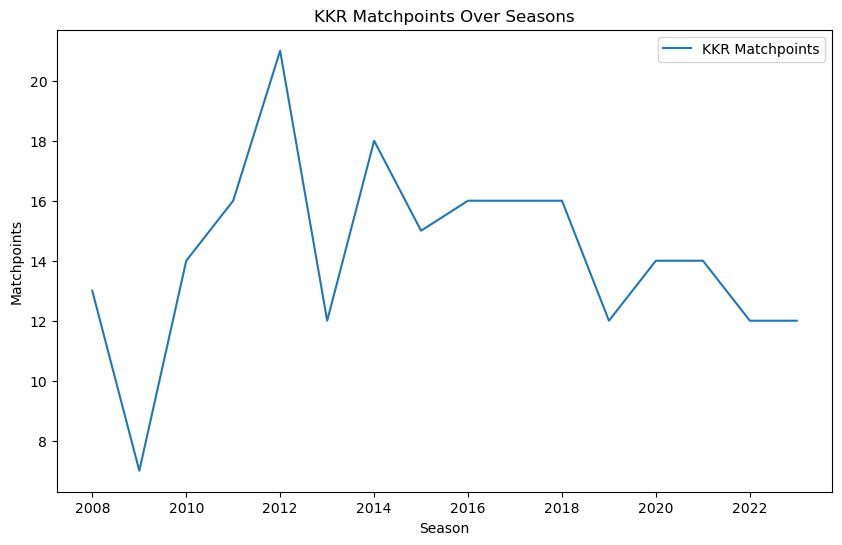

In [7]:
# Set 'season' as the index
kkr_data.set_index('season', inplace=True)

# Visualize the matchpoints trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(kkr_data, label="KKR Matchpoints")
plt.title("KKR Matchpoints Over Seasons")
plt.xlabel("Season")
plt.ylabel("Matchpoints")
plt.legend()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

# Apply ADF test
result = adfuller(kkr_data['matchpoints'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing will be applied.")

ADF Statistic: 0.3171458736787949
p-value: 0.978117597346082
The series is not stationary. Differencing will be applied.


In [11]:
# Differencing to make the series stationary
kkr_data_diff = kkr_data.diff().dropna()
result = adfuller(kkr_data_diff['matchpoints'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing will be applied.")

ADF Statistic: -2.355267826974309
p-value: 0.154761630766785
The series is not stationary. Differencing will be applied.


In [13]:
# Apply second differencing
kkr_data_diff2 = kkr_data_diff.diff().dropna()

In [15]:
adf_result_diff2 = adfuller(kkr_data_diff2)
print(f"ADF Statistic (Second Differencing): {adf_result_diff2[0]}")
print(f"p-value (Second Differencing): {adf_result_diff2[1]}")

ADF Statistic (Second Differencing): -3.4752215846331844
p-value (Second Differencing): 0.008646731892652769


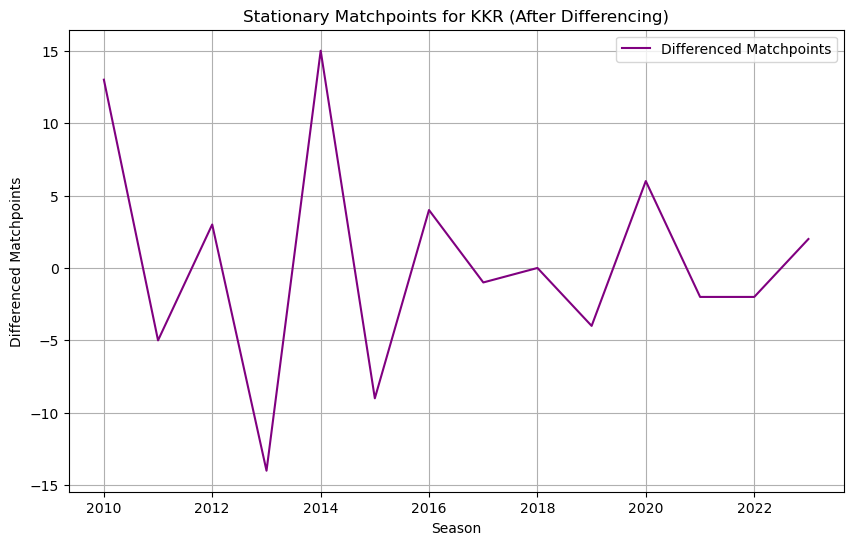

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(kkr_data_diff2, label="Differenced Matchpoints", color='purple')
plt.title("Stationary Matchpoints for KKR (After Differencing)")
plt.xlabel("Season")
plt.ylabel("Differenced Matchpoints")
plt.legend()
plt.grid()
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Train-test split
train = kkr_data['matchpoints'][:int(0.8 * len(kkr_data))]
test = kkr_data['matchpoints'][int(0.8 * len(kkr_data)):]

# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\sampa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\sampa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\sampa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            matchpoints   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -30.359
Date:                Tue, 26 Nov 2024   AIC                             66.717
Time:                        20:57:39   BIC                             67.911
Sample:                    01-01-2008   HQIC                            65.965
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9723      0.111     -8.734      0.000      -1.190      -0.754
ma.L1          0.7689      0.476      1.615      0.106      -0.164       1.702
sigma2        13.2875     10.444      1.272      0.2

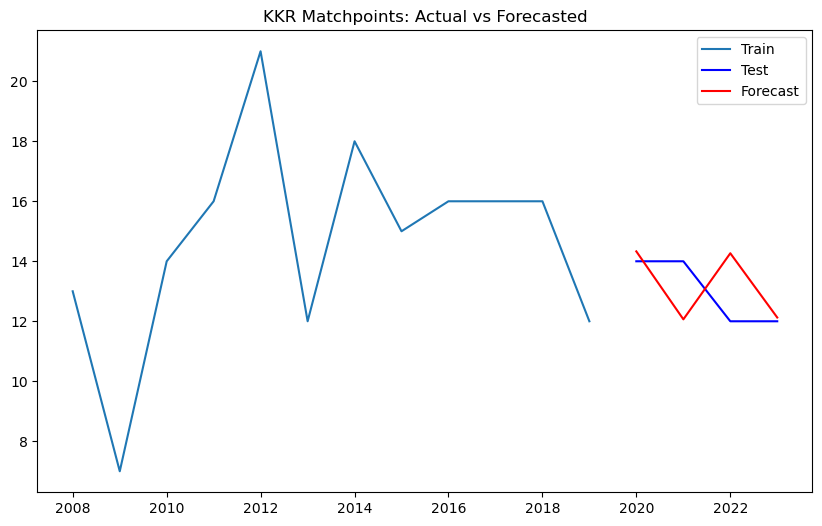

Mean Squared Error: 2.2529853750787656


In [21]:
# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecasted
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color='blue')
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("KKR Matchpoints: Actual vs Forecasted")
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

In [22]:
# Forecast future matchpoints (next 5 seasons)
future_forecast = model_fit.forecast(steps=5)

# Print results
print("Future Matchpoints Forecast:")
for i, points in enumerate(future_forecast, 1):
    print(f"Season {len(kkr_data) + i}: {points:.2f}")

Future Matchpoints Forecast:
Season 17: 14.33
Season 18: 12.06
Season 19: 14.27
Season 20: 12.13
Season 21: 14.21
